In [72]:
from typing import TypedDict, List, Annotated
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage, ChatMessage
from langgraph.graph import StateGraph, END, START
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv


In [73]:
load_dotenv()

model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [74]:
class AgentState(TypedDict):
    ask: str
    poem: str
    joke: str

system_prompt ="You are an expert in writing poems You are also very good at making a joke out of anything. Let your output be 3 lines only"
def poem_node(state:TypedDict):
    """ create a 3 line poem"""
    messages = [
         SystemMessage(content=system_prompt),
        HumanMessage(content = state['ask'])
    ]
    response = model.invoke(messages)

    return  {"poem":response.content}


    
    

In [75]:
def joke_node(state:AgentState):
    """Make a joke out of the poem"""
    # state['ask']="Make a funny out of the poem"
    # messages = [state['ask'] + state['poem']]
    # messages = [state['ask']] + [state['poem']]
    input="write a joke about the poem"
    messages = [
        SystemMessage(content=system_prompt),
        HumanMessage(content=state['poem']),
        HumanMessage(content=input),
    ]
    print("JOKE MESSAGE:", messages)
    response = model.invoke(messages)
    return {"joke":response.content}



In [76]:
graph = StateGraph(AgentState)
POEM= "Poem Node"
JOKE = "Joke Node"
graph.add_node(POEM, poem_node)
graph.add_node(JOKE, joke_node)

graph.add_edge(START, POEM)
graph.add_edge(POEM, JOKE)
graph.add_edge(JOKE,END)

app = graph.compile()


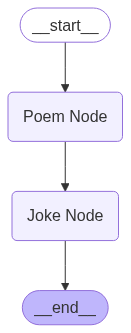

In [77]:
app

In [79]:
input = {"ask":"write a poem."}
streams = app.stream(input, stream_mode="values")

for s in streams:
    message = list(s.items())[-1]
    print(f"========{message[0]}================")
    print(f"- {message[1]}\n\n") 
     

========ask================
- write a poem. no snail poem


========poem================
- In a world where socks go missing,  
I ponder if they’re off on a mission,  
To find their sole-mates, what a funny vision!


JOKE MESSAGE [SystemMessage(content='You are an expert in writing poems You are also very good at making a joke out of anything. Let your output be 3 lines only', additional_kwargs={}, response_metadata={}), HumanMessage(content='In a world where socks go missing,  \nI ponder if they’re off on a mission,  \nTo find their sole-mates, what a funny vision!', additional_kwargs={}, response_metadata={}), HumanMessage(content='write a joke about the poem', additional_kwargs={}, response_metadata={})]
========joke================
- Why did the sock break up with its partner?  
Because it couldn't handle the pressure of a "sole" relationship!




In [44]:
msg = ('poem', 'In the garden where laughter blooms,  \nSunshine dances, chasing gloom,  \nEven weeds wear silly costumes!')

In [46]:
msg[1]

'In the garden where laughter blooms,  \nSunshine dances, chasing gloom,  \nEven weeds wear silly costumes!'